### IDs:
Insert yours IDs to the cell below

ID #1: 327156998

ID #2:


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Data exploration and visialization - practical

Load Boston dataset from sklearn.
Explore the data. follow th instructions below and make sure to support your answers with proper outputs and plots.
When plotting, pay close attention to the range of the axis, and include axis labels and a title for the figure.

1. Describe the dataset. How many samples does it contain? How many features? What isis the data type for each variable?
2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.
3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot). 
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns
import random
import math
from sklearn.datasets import load_boston


# Load Boston Data
boston = load_boston()

C:\Users\baruc\anaconda3\envs\DeepLearningConda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Califo

In [2]:
#print(boston.data.shape)
print(boston.DESCR)
data_df = pd.DataFrame(boston.data, columns=boston.feature_names)
#print(data_df)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
# 1. Describe the dataset. How many samples does it contain? How many features? What is the data type for each variable?

num_samples = boston.data.shape[0]
num_features = boston.data.shape[1]
var_type = type(boston.data[0][0])

print("number of samples = {}, number of features = {}, data type is = {}".format(num_samples, num_features, var_type ))

number of samples = 506, number of features = 13, data type is = <class 'numpy.float64'>


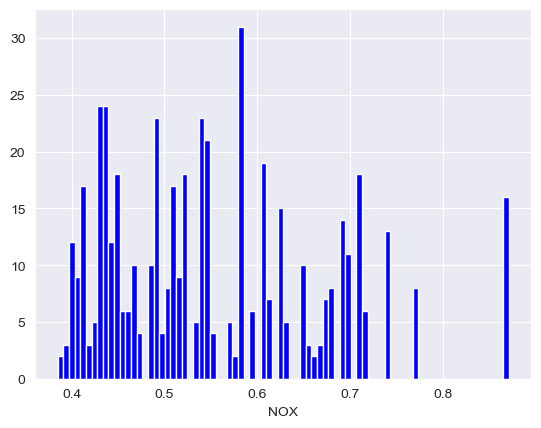

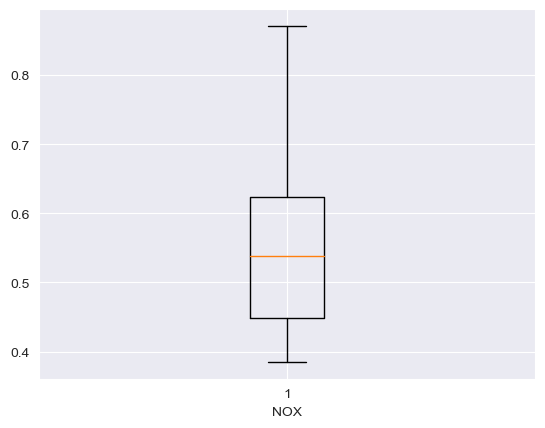

In [4]:
# 2. Produce a histogram and a boxplot of the nitric oxides concentration. describe the distribution.
nox = boston.data[:, 4]

#plot
plt.hist(nox, bins=80, color='blue')
plt.xlabel('NOX')
plt.show()

plt.boxplot(nox)
plt.xlabel('NOX')
plt.show()

#### Answer - describe the distribution
from the box plot we can see that the median is around 0.54,
50% of the data (from the first to third quartile) are between 0.45 - 0.62.
from the histogram we notice that all the data is spread between 0.38 - 0.9,
and most of the data is between 0.4 - 0.72.

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

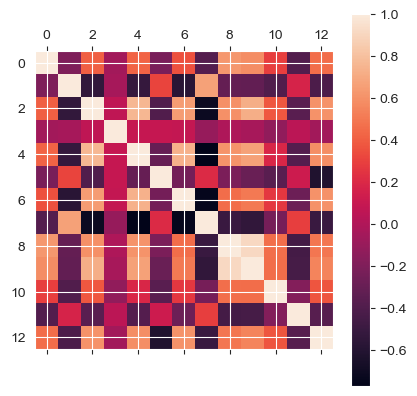

In [5]:
# 3. Produce a correlation matrix of all the features. Are there any correlated features? Can you identify one feature with unusual behaviour?

#Produce a correlation matrix
corr_df = data_df.corr()
print(corr_df)
plt.matshow(corr_df)
plt.colorbar()
plt.show()

Are there any correlated features?
**Answer:** Yes, for each corr_df[i][j] != 0 we get that features (i,j) are correlated.

Can you identify one feature with unusual behaviour?
**Answer:** Yes, CHAS. we notice that CHAS is barely correlated to other features.

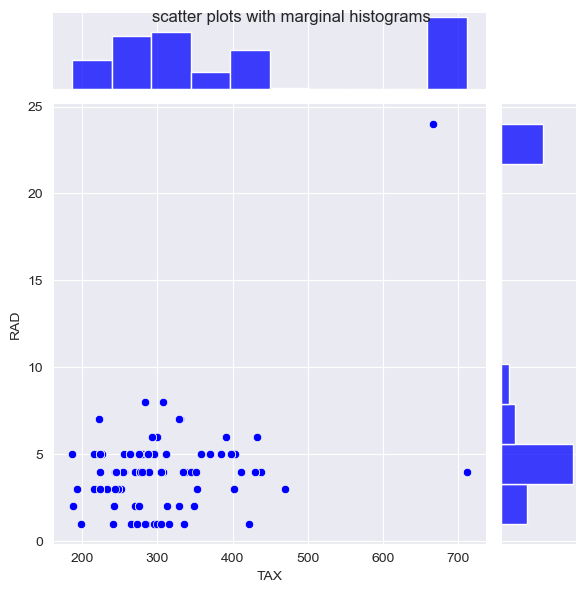

In [6]:
# 4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot).

# First pair the highest correlation RAD and TAX
rad = data_df.loc[:,"RAD"]
tax = data_df.loc[:,"TAX"]

# Create the JointPlot object
joint_plot = sns.JointGrid(x=tax, y=rad)

# Draw the scatter plot
joint_plot = joint_plot.plot_joint(sns.scatterplot, color="b")

# Draw the marginal histograms
joint_plot = joint_plot.plot_marginals(sns.histplot, color="b")

# Set axis labels and title
joint_plot.set_axis_labels("TAX", "RAD")
joint_plot.fig.suptitle("scatter plots with marginal histograms")

# Show the plot
plt.show()

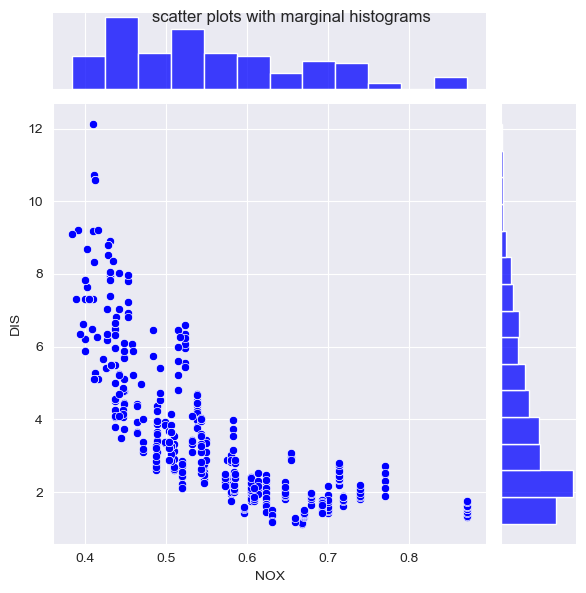

In [7]:
# 4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JointPlot).

# Second-highest correlation pair NOX and DIS
nox = data_df.loc[:,"NOX"]
dis = data_df.loc[:,"DIS"]

# Create the JointPlot object
joint_plot = sns.JointGrid(x=nox, y=dis)

# Draw the scatter plot
joint_plot = joint_plot.plot_joint(sns.scatterplot, color="b")

# Draw the marginal histograms
joint_plot = joint_plot.plot_marginals(sns.histplot, color="b")

# Set axis labels and title
joint_plot.set_axis_labels("NOX", "DIS")
joint_plot.fig.suptitle("scatter plots with marginal histograms")

# Show the plot
plt.show()

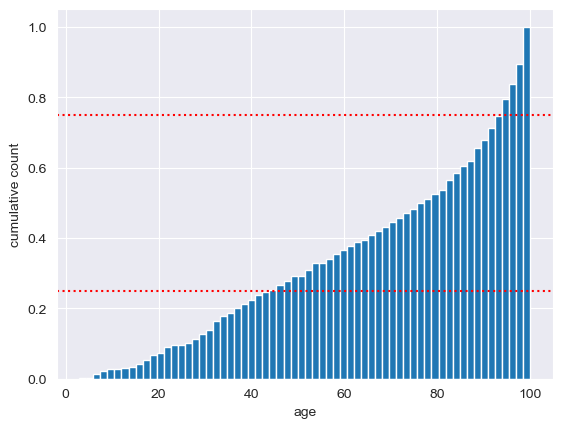

In [8]:
# 5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
ages = data_df.loc[:,"AGE"]

# Compute the cumulative histogram
plt.hist(ages, cumulative=True, bins=64, density=True)
plt.xlabel("age")
plt.ylabel("cumulative count")
# Add the horizontal lines at the first and third quartiles
plt.axhline(0.25, linestyle="dotted", color="r")
plt.axhline(0.75, linestyle="dotted", color="r")

# Show the plot
plt.show()

6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point.

**Answer** -

The NOX and AGE columns have a relatively high positive correlation of 0.731470. This suggests that as the NOX (nitric oxides concentration) increases, the AGE of the buildings in the area also tends to increase.

The RAD and TAX columns have a high positive correlation of 0.910228. This indicates that areas with a high RAD index (index of accessibility to radial highways) tend to have a high TAX (full-value property-tax rate per $10,000). This may suggest that properties in areas with good access to highways tend to have higher property taxes.

### Question 2 - Independence and conditional independence

#### 2.A
Let $\ X, Y \ $ and $Z$  be discrete random variables with $\ n, m \ $ and $k=4$ possible outcomes respectivley.

How many parameters define the joint distribution of $\ X, Y \ $ and $Z$?

**answer** = n * m * 4. 
The number of parameters needed to define the joint distribution of three discrete random variables is equal to the product of the number of possible outcomes for each variable. In this case, the number of parameters needed to define the joint distribution of X, Y, and Z is equal to n * m * k = n * m * 4.

#### 2.B
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that they are independent?

**answer** = n + m + 4.
If we know that three discrete random variables are independent, the number of parameters needed to define their joint distribution is equal to the sum of the number of parameters needed to define the distribution of each variable individually.

#### 2.C
For the same random variables from the previous section, how many parameters define the joint distribution of $\ X, Y \ $ and $Z$ if we now know that $X$ and $Y$ are conditionaly independent given $Z$?

**answer =** If Z can take on k = 4 different values, then the number of parameters needed to describe the conditional distribution of X given Z is n * k = 4n, and the number of parameters needed to describe the conditional distribution of Y given Z is m * k = 4m. Therefore, the total number of parameters is 
(n * k + m * k) = k * (n + m) = 4 * (m + n)

#### 2.D
Give an example for a joint distribution of $\ U, V \ $ and $W$ where $U$ and $V$ are NOT conditionally independent given $W$, but $U$ and $V$ are (unconditionally) independent. Also: $U$ and $V$ are standard normally distributed ($N(0, 1)$) and $W$ is a coin (2 possible values).

#### Answer:
Let U and V be standard normally distributed random variables with mean 0 and standard deviation 1.
Let W be a coin with two possible values, heads and tails, each occurring with probability 0.5.
Define the joint distribution of U, V, and W as follows:
If W = heads, then U and V are independent and have the same distribution as in step 1.
If W = tails, then U and V are dependent and have the following distribution:
U = V with probability 0.5
U = -V with probability 0.5
In this joint distribution, U and V are not conditionally independent given W, because the value of W determines whether U and V are dependent or independent. However, U and V are unconditionally independent, because they are independent regardless of the value of W.

To see this, consider the case where W = heads. In this case, U and V are independent and have the same distribution as in step 1, which is a standard normal distribution.

Now consider the case where W = tails. In this case, U and V are dependent, with U equal to V with probability 0.5 and equal to -V with probability 0.5. However, the distribution of U and V is still a standard normal distribution, because the sum of two independent standard normal random variables is also a standard normal random variable. This means that U and V are unconditionally independent, because their distribution is the same regardless of the value of W.

### Question 3 - Gaussian mixtures – parameter estimation and generation 

Consider the data provided in GMD.csv
Assume that the data comes from a Gaussian mixture distribution (GMD) with $k=3$. Furthermore, assume that $\mu_{1}=4, \mu_{2}=9, \sigma_{1}=\sigma_{2}=0.5, \sigma_3=1.5$ and $w_2=0.25$.

Read the data and answer the following questions.

In [9]:
from sklearn import mixture
import scipy.stats
# Read the data 
# Assume that the file 'GMD.csv' is stored in the same directory as your Python script
gmd_df = pd.read_csv('GMD.csv')
#print(gmd_df)

In [10]:
# get data from second column (first column is just the indexes)
# and compute mean and var from data
gmd_data = gmd_df.values[:, 1]
gmd_mean = np.mean(gmd_data)
gmd_var = np.var(gmd_data)
gmd_sigma = math.sqrt(gmd_var)


(799,)


<Figure size 800x600 with 0 Axes>

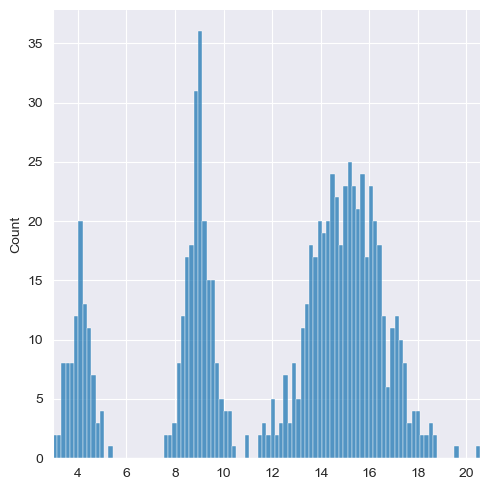

In [11]:
# plot data
plt.figure(figsize=(8,6))
sns.displot(gmd_data, bins=100)
# Setting the x-axis range to start from the minimal value of the data to the maximum
plt.xlim(gmd_data.min(), gmd_data.max())
print(gmd_data.shape)

In [12]:
# given info we don't want to update\estimate
k_given = 3
mean1_given = 4
mean2_given = 9
sigma1_given = 0.5
sigma2_given = 0.5
sigma3_given = 1.5
w2_given = 0.25

# init random values for missing wights, w1 random and w3 complete to 1
w1 = random.uniform(0, 1)
w3 = 1 - w2_given - w1


In [13]:
# init remaining params using Parameter Estimation formulas
mean3 = (gmd_mean - (w1 * mean1_given + w2_given * mean2_given )) / w3

# make into numpy array params
w_old = np.array([w1, w2_given, w3])
sigma_old = np.array([sigma1_given, sigma2_given, sigma3_given])
mu_old = np.array([mean1_given, mean2_given, mean3])

#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

(799,)


<Figure size 800x600 with 0 Axes>

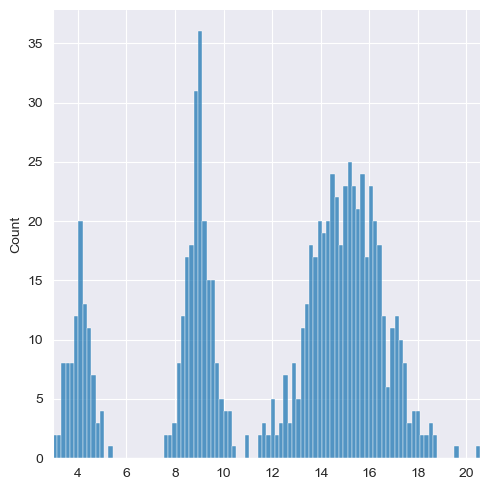

In [14]:
# first way: use visual inspection of the histogram to estimate the parameters

# plot data
plt.figure(figsize=(8,6))
sns.displot(gmd_data, bins=100)
# Setting the x-axis range to start from the minimal value of the data to the maximum
plt.xlim(gmd_data.min(), gmd_data.max())
print(gmd_data.shape)
plt.show()



Estimated parameters:
means = [4, 9, 15]
stds = [0.5, 0.5, 1.5]
weights = [0.15, 0.25, 0.6]


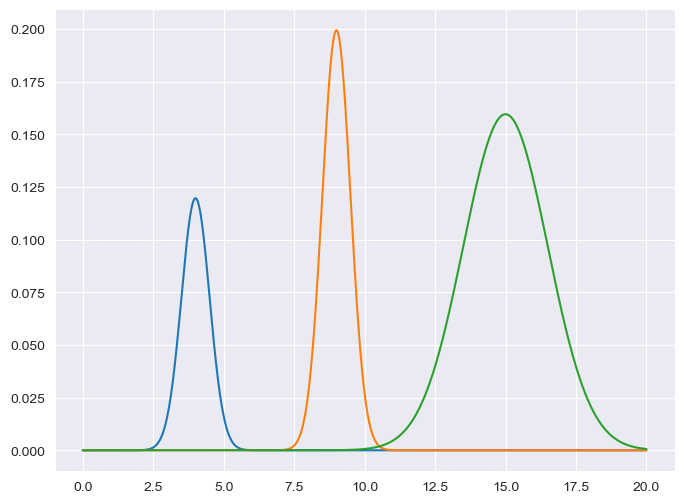

In [15]:
# estimate the parameters of the GMD using visual inspection of the histogram
# the first peak is around 4 (also given), the second peak is around 9 (also given),
# and the third peak is around 15
# the Area under the first peak is around 0.15,
# the Area under the second peak is around 0.25 (also given),
# and the Area under the third peak is around 0.6
# the standard deviation of the peaks are given

#print the estimated parameters
print("Estimated parameters:")
print ("means = [4, 9, 15]")
print ("stds = [0.5, 0.5, 1.5]")
print ("weights = [0.15, 0.25, 0.6]")

#plot the estimated GMD
x = np.linspace(0, 20, 1000)
plt.figure(figsize=(8,6))
plt.plot(x, 0.15 * scipy.stats.norm.pdf(x, 4, 0.5))
plt.plot(x, 0.25 * scipy.stats.norm.pdf(x, 9, 0.5))
plt.plot(x, 0.6 * scipy.stats.norm.pdf(x, 15, 1.5))
plt.show()

In [16]:
from scipy.stats import norm

# Second way: Using EM
def e_step(data, means, covariances, weights):
    responsabilities = []
    for i in range(len(data)):
        responsabilities.append([])
        for j in range(len(means)):
            responsabilities[i].append(weights[j] * norm.pdf(data[i], means[j], covariances[j]))
        responsabilities[i] = np.array(responsabilities[i]) / np.sum(responsabilities[i])
    return responsabilities


def m_step(data, responsabilities):
    means = []
    covariances = []
    weights = []
    responsabilities = np.array(responsabilities)
    for j in range(len(responsabilities[0])):
        means.append(np.sum(responsabilities[:, j] * data) / np.sum(responsabilities[:, j]))
        covariances.append(
            np.sqrt(np.sum(responsabilities[:, j] * np.square(data - means[j])) / np.sum(responsabilities[:, j])))
        weights.append(np.sum(responsabilities[:, j]) / len(data))

    # put given values in the right places
    means[0] = 4
    means[1] = 9
    covariances[0] = 0.5
    covariances[1] = 0.5
    covariances[2] = 1.5
    weights[1] = 0.25

    # normalize weights without changing given values
    scalar = (1 - weights[1]) / (weights[0] + weights[2])
    weights[0] = weights[0] * scalar
    weights[2] = weights[2] * scalar
    return means, covariances, weights


def log_loss(data, means, covariances, weights):
    loss = 0
    for i in range(len(data)):
        for j in range(len(means)):
            loss += weights[j] * norm.pdf(data[i], means[j], covariances[j])
    return -np.log(loss)


def em(data, means, covariances, weights, max_iter=100, tol=1e-3):
    prev_loss = 0
    loss_history = []
    for i in range(max_iter):
        responsabilities = e_step(data, means, covariances, weights)
        means, covariances, weights = m_step(data, responsabilities)
        loss = log_loss(data, means, covariances, weights)
        loss_history.append(loss)
        if abs(loss - prev_loss) < tol:
            break
        prev_loss = loss
    return means, covariances, weights, loss_history

In [17]:
# test the EM algorithm with k = 3
k = 3
# initialize the means, covariances and weights
means = [gmd_mean - 2 * gmd_sigma, gmd_mean, gmd_mean + 2 * gmd_sigma]
covariances = [gmd_sigma, gmd_sigma, gmd_sigma]
weights = [1 / k, 0.25 , 1 - 0.25 - 1/k]
# run the EM algorithm
means, covariances, weights, loss_history = em(gmd_data, means, covariances, weights)
# print the results
print('Means: ', means)
print('Covariances: ', covariances)
print('Weights: ', weights)

Means:  [4, 9, 15.101226618412799]
Covariances:  [0.5, 0.5, 1.5]
Weights:  [0.1239288948621885, 0.25, 0.6260711051378115]


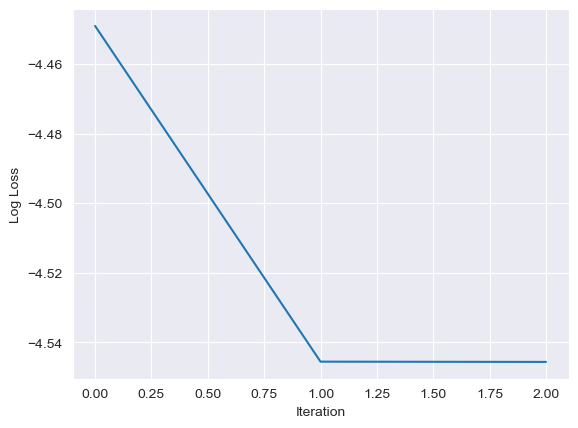

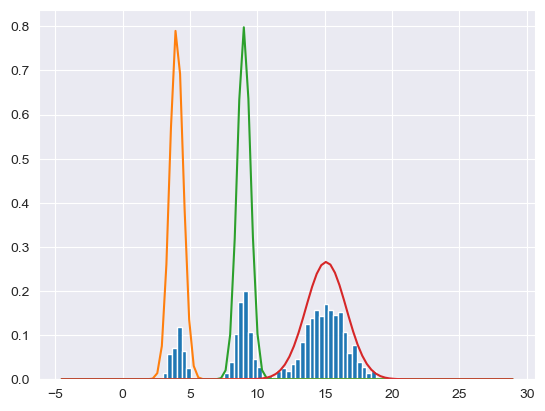

In [18]:
from scipy.stats import norm

# plot the loss history
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.show()

# plot the histogram of the data
plt.hist(gmd_data, bins=50, density=True)
# plot the fitted gaussian distributions
x = np.linspace(gmd_mean - 4 * gmd_sigma, gmd_mean + 4 * gmd_sigma, 100)
for i in range(k):
    plt.plot(x, norm.pdf(x, means[i], covariances[i]))
plt.show()

#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

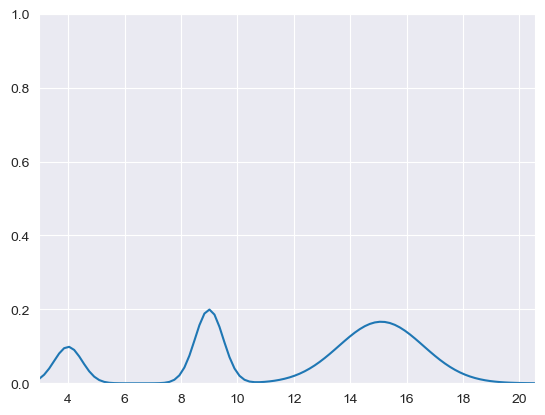

In [19]:
# define a range of x values to plot the PDF
x_min, x_max = np.min(gmd_data), np.max(gmd_data)
x = np.linspace(x_min, x_max, 100)

# calculate the PDF for each Gaussian component
pdfs = []
for i in range(len(means)):
    pdf = weights[i] * norm.pdf(x, means[i], covariances[i])
    pdfs.append(pdf)

# sum the PDFs of the Gaussian components
pdf = np.sum(pdfs, axis=0)

# plot the PDF
plt.plot(x, pdf)

# set the x and y limits
plt.xlim(x_min, x_max)
plt.ylim(0, 1)

plt.show()


#### 3.C
Now assume that the data comes from a Gaussian mixture distribution (GMD) with $k=4$.

The given data and parameters stay the same.

Can you estimate the unknown parameters in the two ways described in section A? Explain.

#### Answer -
Given a Gaussian mixture distribution (GMD) with 4 Gaussian components, it is possible to estimate the parameters of the GMD using the expectation-maximization (EM) algorithm, but it may not be possible to do so using visualizations alone.

The EM algorithm is an iterative method that involves alternating between the expectation (E) step, which estimates the responsabilities of each data point for each Gaussian component, and the maximization (M) step, which estimates the means, covariances, and weights of the Gaussian components based on the responsabilities. By iteratively performing the E and M steps, the EM algorithm can find the parameters of the GMD that best fit the data.

On the other hand, visualizations alone may not be sufficient to accurately estimate the parameters of the GMD. This is because visualizations can only provide a limited amount of information about the data, and it may be difficult to accurately estimate the parameters of a GMD with 4 components by looking at a plot of the data alone.

Additionally, the EM algorithm is able to handle cases where the data does not come from a GMD, as it is able to find the parameters that best fit the data given the GMD model (may give local minimum). Visualizations, on the other hand, may not be able to accurately estimate the parameters in such cases.

#### 3.D
Describe two ways for generating data for a GMM random variable with:
* centers at  $\mu_1=3, \mu_2=7, \mu_3=10$
* $\sigma_1=\sigma_2=\sigma_3=1$
* $w_1=w_2=w_3=0.33$

#### Answer :
Simulating from the GMM: To generate data for a GMM random variable is to simulate data from the GMM using a Monte Carlo method. This involves generating samples from the Gaussian components according to their means, covariances, and weights, and then combining the samples to create a simulated dataset that follows the GMM.

#### Answer :
Sampling from the GMM: Another way to generate data for a GMM random variable, you can sample from the GMM using the scipy.stats.multivariate_normal function. This function allows you to specify the means, covariances, and weights of the Gaussian components, and generates samples from the GMM according to those parameters.

#### 3.E
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


In [20]:
import numpy as np

weights = np.array([1/3, 1/3, 1/3])
means = np.array([3, 7, 10])
variances = np.array([1, 1, 1])


In [21]:
# We will Simulate a GMM using Monte Carlo method

from scipy.stats import norm

num_samples = 1000

# Sample component indices from the weights
component_indices = np.random.choice(3, size=num_samples, p=weights)

# Sample from the selected components
samples = np.array([norm.rvs(loc=means[i], scale=np.sqrt(variances[i])) for i in component_indices])


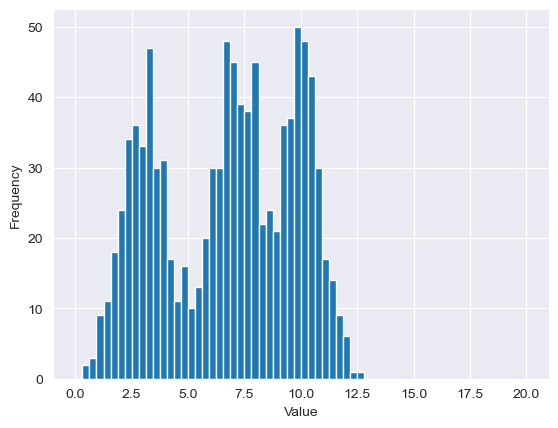

In [22]:
import matplotlib.pyplot as plt
plt.hist(samples, bins=64, range=(0, 20))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


#### 3.F
Use the other one to generate 1000 more points and draw two comparative histograms.

In [23]:
import numpy as np
from scipy.stats import multivariate_normal

means = np.array([[3], [7], [10]])  # 3x1 array
covariances = np.array([[[1]], [[1]], [[1]]])  # 3x1x1 array
weights = np.array([1/3, 1/3, 1/3])



In [24]:
# We will Simulate a GMM using scipy.stats.multivariate_normal
num_samples = 1000

# Sample component indices from the weights
component_indices = np.random.choice(3, size=num_samples, p=weights)

# Sample from the selected components
samples = np.array([multivariate_normal.rvs(mean=means[i], cov=covariances[i]) for i in component_indices])


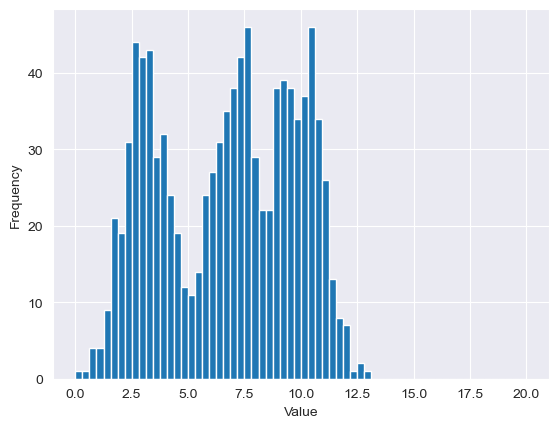

In [25]:
import matplotlib.pyplot as plt

plt.hist(samples, bins=64, range=(0, 20))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 75,000 RCU and a standard deviation of 37,500 RCU.

#### 4.A
What percent of people earn less than 50,000 RCU?

#### Answer
To answer this question, we need to use the z-score formula to standardize the salary data. The z-score is a measure of how many standard deviations a given value is from the mean. We can use the z-score to determine the percentage of people who earn less than a given salary.

To find the z-score of a salary of 50,000 RCU, we first need to find the difference between the salary and the mean salary: 50,000 RCU - 75,000 RCU = -25,000 RCU. We then divide this difference by the standard deviation of the salary data to find the z-score: -25,000 RCU / 37,500 RCU = -0.67.


**According to the z-table, the percentage of people who earn less than a salary of 50,000 RCU is approximately 25%.** This means that 25% of the employees in the Randomistan company earn less than 50,000 RCU.

#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

#### Answer
To find the z-score of a salary of 45,000 RCU, we first need to find the difference between the salary and the mean salary: 45,000 RCU - 75,000 RCU = -30,000 RCU. We then divide this difference by the standard deviation of the salary data to find the z-score: -30,000 RCU / 37,500 RCU = -0.80.

To find the z-score of a salary of 65,000 RCU, we first need to find the difference between the salary and the mean salary: 65,000 RCU - 75,000 RCU = -10,000 RCU. We then divide this difference by the standard deviation of the salary data to find the z-score: -10,000 RCU / 37,500 RCU = -0.27.

To find the percentage of people who earn a salary between 45,000 RCU and 65,000 RCU, we find the percentage of people that earn under 65,000 minus the percentage of people that earn under 45,000 **This means that the percentage of people who earn a salary between 45,000 RCU and 65,000 RCU is approximately 18.5% (39.5% - 21% = 18.5%).**

#### 4.C
What percent of people earn more than 85,000 RCU?

#### Answer
To find the percentage of people who earn more than 85,000 RCU we will find the percentage that earn less than 85,000 RCU and substract it from 1.
we first need to find the difference between the salary and the mean salary: 85,000 RCU - 75,000 RCU = 10,000 RCU. We then divide this difference by the standard deviation of the salary data to find the z-score: 10,000 RCU / 37,500 RCU = 0.27.
According to the z-table, the percentage of people who earn less than a salary of 85,000 RCU is approximately 60.5%. **This means that approximately 39.5% of the employees in the Randomistan company earn more than 85,000 RCU.**

#### 4.D
The company has 1000 employees. How many employees in the company do you expect to earn more than 140,000 RCU?

#### Answer
To find the percentage of people who earn more than 140,000 RCU we will find the percentage that earn less than 140,000 RCU and substract it from 1.

we first need to find the difference between the salary and the mean salary: 140,000 RCU - 75,000 RCU = 65,000 RCU. We then divide this difference by the standard deviation of the salary data to find the z-score: 65,000 RCU / 37,500 RCU = 1.73.
According to the z-table, the percentage of people who earn less than a salary of 140,000 RCU is approximately 96%. **This means that approximately 4% of the employees in the Randomistan company earn more than 140,000 RCU.**

The company has 1000 employees so **we will expect 1000 * 0.04 = 40 employees to earn more than 140,000 RCU**

### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

In [26]:
def expected_waiting_time(n):
  """
  Computes the expected waiting time for full single coupon collection with N different equiprobable coupon types.
  
  Parameters:
  N (int): The number of different coupon types.
  
  Returns:
  float: The expected waiting time.
  """
  if n == 0:
     return 0
  return n * sum([1.0 / i for i in range(1, n + 1)])

#### 5.B
Write code to compute the exact value of $V(T_{N})$

In [27]:
def variance_waiting_time(n):
  """
  Computes the variance of the waiting time for full single coupon collection with N different equiprobable coupon types.
  
  The variance of the waiting time is calculated using the following formula:
  V(TN) = N(N-1) * Σ(1/i^2), where i ranges from 1 to N
  
  This formula can be derived using the coupon collector's problem as follows:
  V(TN) = Σ(V(T|N)), where V(T|N) is the variance of the waiting time given that there are N coupons remaining to be collected.
  V(T|N) = 1 + V(T|N-1), where the 1 represents the variance of the time to collect the first coupon, and V(T|N-1) represents the variance of the waiting time given that there is 1 coupon remaining to be collected.
  Substituting the second equation into the first equation, we get:
  V(TN) = Σ(1 + V(T|N-1))
  V(TN) = Σ(1 + (N-1) * Σ(1/i^2)), where i ranges from 1 to N-1
  V(TN) = N(N-1) * Σ(1/i^2), where i ranges from 1 to N
  
  Parameters:
  N (int): The number of different coupon types.
  
  Returns:
  float: The variance of the waiting time.
  """
  if n == 0:
     return 0
  return n * (n - 1) * sum([1.0 / (i * i) for i in range(1, n + 1)])


#### 5.C
Write code to exactly compute $P(T_{30}>60)$

In [28]:
from scipy.stats import norm
def prob_wait_more(n = 30, t = 60):

    # Compute the mean and variance of the waiting time
    mean = expected_waiting_time(n)
    variance = variance_waiting_time(n)
    sigma = math.sqrt(variance)

    # Compute the probability that the waiting time is greater than 60
    prob = 1 - norm.cdf(t, mean, sigma)
    return prob
print(prob_wait_more(n = 30, t = 60))


0.9449876057900535


#### 5.D
Let $S_N$ denote the waiting time until $N/2$ different coupons are collected.

Write code to exactly compute $P(S_{30}>60)$

In [29]:
from scipy.stats import norm
# we will use the fact that S_N is a sum of independent random variables.
def prob_wait_half_more(n = 30, t = 60):
    # Compute the mean and variance of the waiting time
    n = 30
    k = n // 2  # Number of different coupons to collect
    mean = expected_waiting_time(k)
    variance = variance_waiting_time(k)
    sigma = math.sqrt(variance)

    # Compute the probability that the waiting time is greater than 60
    prob = 1 - norm.cdf(60, mean, sigma)
    return prob
print(prob_wait_half_more(n = 30, t = 60))


0.28728064068077863
